# What's it like to be a 10th grader?
<hr>


## Outline
<ol>
<li>Introduction
    <ul>
    <li>1.1 Background</li>
    <li>1.2 Libraries Used</li>
    </ul>
</li>
<li>Data Collection
    <ul>
    <li>2.1 Data Source</li>
    <li>2.2 About the Data</li>
    <li>2.3 Using the Data in Python</li>
    </ul>
</li>
<li>Exploratory Analysis & Data Visulation</li>
    <ul>
        <li>3.1 Total Hours Spent Doing Homework</li>
        <li>3.2 Creating Hypotheses</li>
        <li>3.3 Linear Regression</li>
    </ul>
<li>Predictive Model Analysis</li>
<li>Discussion of Findings</li>
<li>Citations</li>
</ol>

## 1: Introduction

Every chilly November morning I had my first class of the day in a brick wall class room. This was my honors 10th grade english class--most people in this class were at least fairly literate. Even so, half of the class would be nodding off or spacing out when the teacher asks about whether or not the gerund up on the projector was grammatical in the sentence, or why Gatsby was obsessed with the color green, or how you should use MLA citations. <br>
However one day, we got the teacher off track enough that we were 30 minutes into class and she didn't feel like teaching anymore (she must have been tenured, that lady was not fully mentally anyways) so she decided to go around the room and ask everyone where they saw themselves in five years. Mostly I got to hear my best friend talk about how she'll be in law school, and my friend from middle school discuss how he is already starting to work in his dad's plumbing business. I'm not paying attention much; it is 8am after all.

But I definitely tune back in when I hear the quiet kid say:<br>
"Probably in the back of some van."<br>
That was a very brash response, but some people do want to live out of vans and travel the country. So as any decent person would, the teacher says he probably wants to do it to travel or play music and be in a band, right?<br>
He responds<br>
"No, hopefully not breathing."<br>
Uhh.... Obviously I look at my friend next to me and everyone else in the class is making eyes at each other as well. This teacher, not having much mental hold of herself on a normal day already, says with an uncomfortable chuckle "that's morbid" and then we move onto the next person.

Fortunately, it's been about five years and that kid is still breathing and not in the back of some van. He came into the restaurant I was a server at once with his family and they all seemed very nice. However, unlike many of the other kids in that class, he did not attempt to pursue any higher education and I believe he is now practicing Buddism daily.<br>
Sometimes I wonder if had he had a better experience in life overall that year if maybe he would have at least gone to community college, or applied to some small schools the next fall that would have given him a scholarhsip. There is nothing wrong with practicing Buddism, though he was intelligent and could have definitely been closer to a stable career path by now if he had a plan for his future in high school.
<br>

We all either have been or will be 10th graders at one point in life. Maybe that was the year you finally joined cross country, the year you and your best friend became no longer friends, or the year you asked your crush to the dance and they said yes.<br>
Sophomore year of high school for many hosts the creation of memories to last a lifetime. Though as you are growing socially and in real-life experience, you are also at a cornerstone for making decisions about colleges, majors, and careers. The memories garnered during 10th grade will be the evidence to shape a sense of self and percieved place in life which determine your decisions about where you see yourself in 5 and 20 years.

### 1.1 Background
There are many proposed factors influencing what careers paths people will end up with. For example, the aptitudes, attitudes, and expectations of peers and parents, how well a student did in previous classes, how much recognition a student gets for good work, or their socioeconomic background.<br>
The University of Michigan has conducted a <a href="https://www.lsay.org/about.html">logitudinal study</a> following students and their parents from 7th to 12th grade, where each year they answer a set of questions related to school and other questions about their lives and opinions.
They provide the full dataset from these surveys, including questions about the amount of homework they do for a class, their opinions on specific subjects, teacher gender, and summer activities.

### 1.2 Libraries Used
<ul>
<li>Pandas: Displaying and organizing dataframes</li>
<li>Numpy: Conducting operations on data</li>
<li>Matplotlib: Plotting Data</li>
<li>Scikit-learn: Predictive Modeling</li>
</ul>

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk

%matplotlib inline

## 2: Data Collection

### 2.1 Data Source
My data comes from the <a href="https://www.lsay.org/about.html">Longitudinal Study of American Youth (LSAY)</a> conducted by the Univeristy of Michigain. [1] The actual data was downloaded from <a href="https://www.icpsr.umich.edu/web/ICPSR/studies/30263?q=LSAY">IPCSR</a>, an archive of social science datasets.

### 2.2 About the Data
This dataset contains 11,904 columns, a few corresponding to either demographics and identifiers, and most containing the response from each survey question. Each row is the answer for a student (case), and that row includes all questions answered throughout the study and are not grouped by years (2014-2017). A difference in year is denoted by the letters in the column code. A full description of the data is available in the dataset's <a href="/files/30263-0001-Codebook-ICPSR.pdf">codebook</a>.

There are a total of 5,945 cases in the dataset. Students were interviewed once in the fall and once in the spring every year between 7th and 12th grade, and their parents were interviewed once every year.

### 2.3 Using the Data in Python
First, the data must be loaded into python. Pandas has a method which reads a stata file into a dataframe, and stata was the filetype of the data I'm using (denoted by the .dta extension). Pandas also has methods for reading in <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_spss.html">SPSS</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">CSV</a> files.

In [2]:
all_data = pd.read_stata('long_study_school.dta', convert_categoricals=False)
all_data.head()

,CASENUM,COHORT,SCHOOLID,STRATA,ASCICLS,ASCITCH,ASTSEX,AMTHCLS,AMTHTCH,AMTSEX,...,PEDUC3,MEDSRCE,FEDSRCE,MOTHOCC,FATHOCC,POCI,FOCCSRCE,MOCCSRCE,MOTHSEI,FATHSEI
0,1001,1,309,6,-95,-95,-95,-95,-95,-95,...,1,2,3,395,785,0,5,4,34,15
1,1002,2,132,11,132032,13203,1,132061,13206,2,...,4,7,7,-99,-99,-99,-99,-99,-99,-99
2,1003,1,309,6,-95,-95,-95,-95,-95,-95,...,1,3,2,988,535,0,4,5,-98,27
3,1004,2,126,8,126026,12602,2,126101,12610,2,...,1,8,8,270,331,0,11,11,55,53
4,1005,2,133,11,-99,-99,-99,133024,13302,1,...,4,3,7,65,471,0,2,3,87,32


Looking at the results of the head() function, this dataset has 11,904 columns, which is far more than will be useful for a single exploratory data analysis project. In order to get a better idea as to what data I may look at, I skimmed the associated codebook, which gives a description for each column name.

## 3: Exploratory Data Analysis & Data Visulation

### 3.1 Total Hours Spent Doing Homework
I decided to first explore the hours of homework completed by 10th graders, since I feel like this could give good insight into attitudes about life and school. <br>
I plan to create a sum of all the homework hours per week across all subjects, adding 0 if there is a response of -99 (which according to the codebook, indicates that they did not take a respective course during that term) and recording if the data is blank (-98), they did not participate in that question (-95), or the data was uncodable (-96). From this, I can look to see if there are any common outcomes predicted by the number of hours of homework each week. 


This code filters the table to only include columns which correspond to the appropriate codes for the number of hours of homework 
reported by 10th graders.<br>
The first letter is either G or H, meaning that this includes the reponses from the 10th graders in the fall (G) and in the spring (H).
The next letter must be A after the first, because the 'A' group asks questions directly related to schoolwork. <br>
Next, there is a 3 character code related to the subject (for example, MTH for Math and COM for Computer). This is matched as any 
three characters in the regular expression. <br>
After this three character subject marker, there may or may not be a digit appearing afterwards. This is present when there are more 
than one of a subject that a student can be enrolled in during that semester, and in that case the first class will have a 1 added 
and the second a 2. If the regular expression does not look for this number, any subjects with more than one option would be excluded.
Finally, the column code needs to end in the letter J, as this is the code in section A that asks how many hours of homework a week
that students has for that subject. <br>
When I use regular expressions, I find it easier to test them first online before trying to run it in code, that way if it is not working I know it was the regular expression specifically. Some websites also show you how much was matched and if any groups were matched; I like <a href="https://regex101.com/">regex101.com</a>.

The CASENUM column should also be included in order to maintain which student the questions correspond to in case the original dataframe is to be referenced later.

In [3]:
tenth_hours = all_data.filter(regex=("^([GH]A.{3}[12]?J)|(CASENUM)$"))
# Note, the filter method does not remove the columns which don't make it past the filter, 
# so this is stored as a new dataframe, tenth_hours.

tenth_hours.head()

,CASENUM,GAMTH1J,GAMTH2J,GASCI1J,GASCI2J,GAENG1J,GAENG2J,GASSTJ,GACOMJ,GAFORJ,...,HASCI1J,HASCI2J,HAENG1J,HAENG2J,HASSTJ,HACOMJ,HAFORJ,HAARTJ,HAMUSJ,HAVOCJ
0,1001,1,-99,3,-99,1,-99,-99,-99,-99,...,2,-99,1,-99,2,-99,-99,-99,-99,0
1,1002,5,-99,3,-99,3,-99,-99,-99,-99,...,5,-99,1,-99,-99,-99,-99,0,-99,-99
2,1003,3,-99,4,-99,3,-99,-99,-99,4,...,4,-99,4,-99,-99,-99,3,-98,-99,-99
3,1004,-95,-95,-95,-95,-95,-95,-95,-95,-95,...,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95
4,1005,1,-99,1,-99,1,-99,-99,-99,1,...,1,-99,0,-99,-99,-99,1,-99,1,-99


By using the head() function, we can confirm that we did retrieve the desired columns. Another option would be to print the columns method of the dataframe and check that that includes all the codes I wanted to find. <br>
We also can double check that there is an appropriate number of columns; 25. Looking at the codebook, this is indeed the number of codes that are questions asked to 10th graders about the number of hours per week spent on homework, plus one for the case number column.

Although this filtered dataset contains considerably less data than the original dataset, it is still not easily interpreatble. 
Because there are already so many columns in the filtered dataset, we can create a new dataframe which contains the case number (which allows cross-referencing between tables) and for now, the number of hours total spent per week across all subjects doing homework, the number of classes a student was taking, the number of noncodable questions, and the number of questions a student skipped or did not participate in.
Including the information about why a question was not answered could potentially give insight into the accuracy of the conclusions of the data, and it may also allow a case to be excluded altogether if they did not participate in any of the questions (sum is 24 as there are 24 codes observed).<br>
This new dataframe could also be used later to store more esteem about a student. The number of classes could help determine an average time per class, or point to a student who has less hours because the given subjects do not describe their actual schedule well.

In [24]:
statistics = pd.DataFrame(columns=['CASENUM', 'HOURSTOTAL', 'SKIPS', 'NONPART', 'NONCOD', 'NUMENROLLED'])


# Getting the column names for the full tenth grade datset.
# The values at CASENUM are not answers to a question and is removed from this list
columns = list(tenth_hours)
columns.remove('CASENUM')

for index, row in tenth_hours.iterrows():
    total_hours = 0
    skips = 0
    nonpart = 0
    non_code = 0
    num_enrolled = 0

    # iterate over each column name in the dataframe
    for code in columns:
        if row[code] == -98:
            # response is blank (no response)
            skips += 1
            
        elif row[code] == -95:
            # student did not participate in this question
            nonpart += 1
        
        elif row[code] == -96:
            non_code += 1

        elif row[code] != -99:
            num_enrolled += 1
            total_hours += int(row[code])
        
    statistics.loc[len(statistics.index)] = [row['CASENUM'], total_hours, skips, nonpart, non_code, num_enrolled]

statistics.head()

,CASENUM,HOURSTOTAL,SKIPS,NONPART,NONCOD,NUMENROLLED
0,1001,10,0,0,0,8
1,1002,19,0,0,0,8
2,1003,28,1,0,0,9
3,1004,0,0,24,0,0
4,1005,8,0,0,0,10


Next, the cases that did not participate in any questions should be removed since they do not record any of the data we are looking for. This happens when the non-participation value is 24.

In [25]:
# This code selects the subset of the dataframe which meets the given condition:
# that NONPART is not 24, effectively removing any rows which do have a non-particpation count of 24.
statistics = statistics[statistics.NONPART != 24]

statistics.head()

,CASENUM,HOURSTOTAL,SKIPS,NONPART,NONCOD,NUMENROLLED
0,1001,10,0,0,0,8
1,1002,19,0,0,0,8
2,1003,28,1,0,0,9
4,1005,8,0,0,0,10
6,1007,30,0,0,0,10


Now that the data is a bit cleaned up, I'm interested in seeing some basic descriptive statistics about the number of hours students spend doing homework in total, which will help guide my further analysis.

In [26]:
col = statistics['HOURSTOTAL']

print(col.describe())

print(f'\nCount: {col.count()}')
print(f'Min: {col.min()}')
print(f'Max: {col.max()}')
print(f'Mean: {col.mean()}')
print(f'Median: {col.median()}')
print(f'Standard deviation: {col.std()}')

count     5415
unique     130
top          8
freq       202
Name: HOURSTOTAL, dtype: int64

Count: 5415
Min: 0
Max: 180
Mean: 21.513388734995385
Median: 18.0
Standard deviation: 18.059749677824854


This not only allows me to make sure I properly gathered data (i.e if the min is negative then I must have added the hour codes incorrectly), but also to remind myself what my data means.
I looked at the mean of 21.5 hours of homework spent per week and felt that it was high. That was when I realized that the total number of hours of homework a week is over two semesters, so this mean is double what it would be on an actual given week.
However, when predicting answers to other questions, this being realistically high is not important; it can still be a predictor, and students can be grouped by their mean hours over two as this would normalize the data in cases where a student may have a lot of work one semester but less the next, over the entire year having the same as other students.

I'm curious to see if the data is skewed and if there are outliers, so I will make a boxplot with mathplotlib.

Text(0.5, 0, 'Hours')

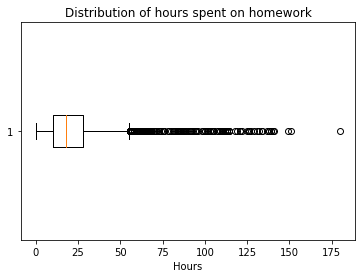

In [30]:
fig, ax = plt.subplots()

# the vert option specifies that the boxplot should *not* be vertical
ax.boxplot(col, vert=0)
ax.set_title("Distribution of hours spent on homework")
ax.set_xlabel("Hours")

This boxplot shows that there are significant outliers to the data. Students do have the option on the survey to report doing up to 50 hours of homework a week for a single class, so the large outliers are possible.<br>
Knowing that there are these outliers means that in later data analysis, we may want to exclude those from that. (Outside of upper or lower fence = do not count).

### 3.2 Creating Hypotheses

It's cool to see the amount of time that students spend doing homework, however this data will be most useful if we can make predictions based on it.<br>
The survey asked questions about the students self esteem and future plans, which I believe and am at least interested in knowing, possibly being correlated with the number of hours a week a student has.<br>
Students who do more homework are usually in more rigorous classes and care about their schoolwork. However, a large amount could take a toll on their self esteem and how able they feel they are to handle a career in those subjects, especially if they have a lot of homework.

I hypothesize that students who have an average to a bit below average amount of homework have the best self esteem, whereas students with littel or a lot of homework have lower self esteem.
I would then potentially be able to try to see if there is a relationship between a student's self esteem and their future plans. If there is, then it would follow a distribution similar to self esteem, however if it does not I hypothesize that it will be a linear distribution, with students who have the least amount of homework having the least academically ambitious plans and those with the most homework the most academically ambitious plans.

These are guesses based on my intuition rather than previous research.

Looking at the codebook, the class of questions about self-opinion are denoted by the last three charcters, which are 29[A-L] (the codes skip F). These are the questions:
<ul>
<li>A. Positive attitude toward self</li>
<li>B. Good luck more important than work</li>
<li>C. I am a person of worth</li>
<li>D. Able to do things as well as others</li>
<li>E. Try to get ahead; thwarted</li>
<li>G. Plans hardly ever work out</li>
<li>H. People who accept their conditions are happier</li>
<li>I. Generally satisfied with self</li>
<li>J. Wish I respected myself more</li>
<li>K. We should leave tomorrow to take care of itself</li>
<li>L. Feel I am a failure</li>
</ul>

There are positive and negative questions in this grouping, which will make it slightly more difficult to convert the data to something which is able to be used in mathematical models, but it will just take some manual noting.

I have decided that A, C, D, H, I, and K are positive questions (where a lower number--denoting 'Strongly Agree', is better) and B, E, G, J, and L are negative questions (where a lower number is worse).

The following code stores the regular expressions for positive questions and separately negative questions.

It then creates a regular expression to filter the entire table by combining these with a format string, and uses that to, like with the hours of schoolwork, create a new dataframe with only the information about self-esteem and outlook on life.

In [33]:
rpos = "([GH]A29[ACDHIK])"
rneg = "([GH]A29[BEGJL])"

reg = f'^{rpos}|{rneg}|(CASENUM)$'

self_esteem = all_data.filter(regex=(reg))
self_esteem.head()

,CASENUM,GA29A,GA29B,GA29C,GA29D,GA29E,GA29G,GA29H,GA29I,GA29J,GA29K,GA29L
0,1001,1,1,1,3,3,3,-98,-98,-98,-98,-98
1,1002,2,5,1,2,3,4,2,4,2,2,2
2,1003,2,5,1,1,2,4,2,2,4,2,5
3,1004,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95,-95
4,1005,2,4,1,1,4,4,4,1,4,1,4


In order to remove any non-answer values, I will repeat the code I used to look at the number of hours but this time for the self esteem questions. Furthermore, instead of summing all of the self esteem values, instead I will have a column which sums the number of positive values and the sum of negative values. 

In [39]:
import re

esteem = pd.DataFrame(columns=['CASENUM', 'SUMPOS', 'SUMNEG', 'SKIPS', 'NONPART', 'NONCOD', 'RESP'])


# Getting the column names for the full tenth grade datset.
# The values at CASENUM are not answers to a question and is removed from this list
columns = list(self_esteem)
columns.remove('CASENUM')

for index, row in self_esteem.iterrows():
    spos = 0
    sneg = 0
    skips = 0
    nonpart = 0
    non_code = 0
    responses = 0

    # iterate over each column name in the dataframe
    for code in columns:
        if row[code] == -98:
            # response is blank (no response)
            skips += 1
            
        elif row[code] == -95:
            # student did not participate in this question
            nonpart += 1
        
        elif row[code] == -96:
            non_code += 1

        elif row[code] != -99:
            responses += 1
            if re.match(f'^{rpos}$', code) != None:
                spos += int(row[code])
            elif re.match(f'^{rneg}$', code) != None:
                sneg += int(row[code])
        
    esteem.loc[len(esteem.index)] = [row['CASENUM'], spos, sneg, skips, nonpart, non_code, responses]

# remove any rows where the case did not participate in any questions
esteem = esteem[esteem.NONPART != 11]

esteem.head()

,CASENUM,SUMPOS,SUMNEG,SKIPS,NONPART,NONCOD,RESP
0,1001,5,7,5,0,0,6
1,1002,13,16,0,0,0,11
2,1003,10,20,0,0,0,11
4,1005,10,20,0,0,0,11
6,1007,16,15,0,0,0,11


Unfortunately, a skipped question is a missing not at random (MNAR) variable. Because these are questions about mental health, some students may be too ashamed, scared that someone will see their responses, or unable to come to a decision about how they do feel.

Because there are already so many datapoints, I want to try to drop any case where there is at least one skipped question.

In [41]:
esteem = esteem[esteem.SKIPS == 0]

esteem.describe()

,CASENUM,SUMPOS,SUMNEG,SKIPS,NONPART,NONCOD,RESP
count,4648,4648,4648,4648,4648,4648,4648
unique,4648,26,21,1,1,3,3
top,1002,14,18,0,0,0,11
freq,1,613,528,4648,4648,4587,4587


From the data given by describe, removing questions with where parts were skipped still leaves a lot of data, so I feel this is a reasonable approach to dealing with the MNAR variables. Including those in the analysis does not give a complete picture.

There are 6 positive questions and only 5 negative questions, so this must be normalized. To do so, I am dividing the postive sums by 6 and the negative sums by 5. I then will add a new column which has the 'score', which is the positive normalized score less the negative normalized score.

In [42]:
for index, row in esteem.iterrows():
    pos_norm = 0.0 + row['SUMPOS']/6
    neg_norm = 0.0 + row['SUMNEG']/5
    score = pos_norm - neg_norm

    esteem.at[index, 'SCORE'] = score

esteem.head()

,CASENUM,SUMPOS,SUMNEG,SKIPS,NONPART,NONCOD,RESP,SCORE
1,1002,13,16,0,0,0,11,-1.033333
2,1003,10,20,0,0,0,11,-2.333333
4,1005,10,20,0,0,0,11,-2.333333
6,1007,16,15,0,0,0,11,-0.333333
7,1008,11,19,0,0,0,11,-1.966667


### 3.3 Linear Regression

Now that we have numerical values that can be associated with an independent and dependent variable, a linear regression can be constructed.

However first we need a table that is joined to have only values where both tables have the same case number. We can do this with an inner merge on casenum.

In [45]:
regressiondat = pd.merge(statistics, esteem, how='inner', on='CASENUM')

regressiondat = regressiondat.filter(items=['CASENUM', 'HOURSTOTAL', 'SCORE'])

regressiondat.head()

,CASENUM,HOURSTOTAL,SCORE
0,1002,19,-1.033333
1,1003,28,-2.333333
2,1005,8,-2.333333
3,1007,30,-0.333333
4,1008,25,-1.966667


<AxesSubplot:title={'center':'Total number of hours spent on homework a week vs. self-esteem score'}, xlabel='HOURSTOTAL', ylabel='SCORE'>

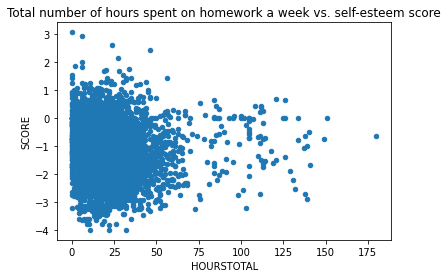

In [56]:
regressiondat.plot(x='HOURSTOTAL', y='SCORE', kind='scatter', title="Total number of hours spent on homework a week vs. self-esteem score")

What would this graph look like instead if the outliers were removed?

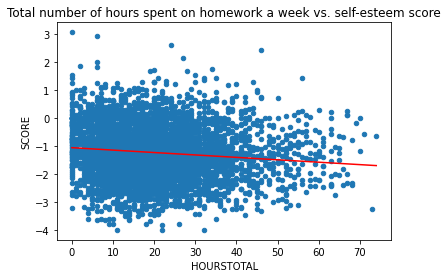

In [62]:
no_outliers = regressiondat[np.abs(regressiondat.HOURSTOTAL-regressiondat.HOURSTOTAL.mean())<=(3*regressiondat.HOURSTOTAL.std())]

no_outliers.plot(x='HOURSTOTAL', y='SCORE', kind='scatter', title="Total number of hours spent on homework a week vs. self-esteem score")

#plotting linear regression line
xlist = list(no_outliers['HOURSTOTAL'])
ylist = list(no_outliers['SCORE'])

inter_list = [i for i in np.linspace(min(xlist), max(xlist), num=5)]
coeff = np.polyfit(xlist, ylist, 1)
yvals = [x*coeff[0]+coeff[1] for x in inter_list]
plt.plot(inter_list, yvals, color='red')

There does appear to maybe be a weak relationship between hours of homework each week and self-esteem, although it is not much. 

However, now I could look to see if there was a relationship between hours of homework and future plans in my next opportunity to perform data analysis.

### 4: Predictive Model Analysis
Though the hours of schoolwork each week may not be a strong predictor, there are definitely other factors which might. If I had time, I would attempt to create a decision tree based on my score I've calculated, in addition to other factors such as family involvement and peer relationships.
I would not want to create a decision tree based on every question however, because that would not be useful to make predictions as there are so many questions.

Though it will be a weak prediction, I can still create a linear regression and see its predictions.

In [55]:
import statsmodels.api as sm

X = [[x] for x in regressiondat['HOURSTOTAL']]
y = regressiondat['SCORE']

lreg = sm.OLS(y, X).fit()

print("----------Linear Regression Parameters------------")
print(lreg.params)

print(lreg.summary())

----------Linear Regression Parameters------------
x1   -0.034963
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                  SCORE   R-squared (uncentered):                   0.396
Model:                            OLS   Adj. R-squared (uncentered):              0.396
Method:                 Least Squares   F-statistic:                              3052.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:19:22   Log-Likelihood:                         -7503.8
No. Observations:                4648   AIC:                                  1.501e+04
Df Residuals:                    4647   BIC:                                  1.502e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err       

In [63]:
# example prediction

lreg.predict([[20]])

array([-0.69925586])

Based on this, a student who studies 20 hours a week (but really 10 when you account for semesters) is likely to have a slightly lower self-esteem.

### Discussion of Findings

Most students who were surveyed did have a lower self-esteem score. If I were to look further into this dataset, I might compare this self esteem score across time and see if it became lower as they got older. I would also look to see if there is a correlation between hours of homework and future aspirations; this may be stronger predicted by the number of hours a student spends on homework.

## Citations

[1] Miller, J. D. (2021). *Longitudinal Study of American Youth, 1987-1994, 2007-2011, 2014-2017* [Data set]. doi:10.3886/ICPSR30263.v7



Inspiration for organization of page from https://summerzzzy.github.io/

#### Page created by Ashley Rider